<a href="https://colab.research.google.com/github/drsimonturega/vs_supra_rep/blob/main/data_for_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Virtual screening for high affinity guests for synthetic supramolecular receptors

### Orginal literature
 https://doi.org/10.1039/C5SC00534E

#### Reseting the node we are on
Removing the data set and simons_data_science_library so we can re-run the experiment. This uses the ```rm``` command be careful.

In [2]:
#this has to run outside of colab as well as in colab
#check if this file path is relative or absolute
def rmrs_dir():
  %cd /content
  !rm -rf simons_data_science_library vs_supra_rep
  !pwd
  !ls


In [3]:
rmrs_dir()

/content
/content
sample_data


### Clone my data science library

#### simons_data_science_library
This GitHub repository conatins  the python classes and methods you need to run our expeiment. we will be using the *dat_tran*, *db_utils* and *plotter* claesses and the methods within.

In [4]:
!git clone  https://github.com/drsimonturega/simons_data_science_library.git

Cloning into 'simons_data_science_library'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 27 (delta 8), reused 17 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 15.84 KiB | 3.17 MiB/s, done.
Resolving deltas: 100% (8/8), done.


#### Check the python class *.py* files are in the *simon_data_science_libaray* directory
Using the ```ls``` command.

In [5]:
ls simons_data_science_library

dataframe_tran.py  dat_tran.py  plotter.py
dat_frame_inf.py   db_utils.py  README.md


#### Imports

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from simons_data_science_library import dat_tran as dtran
from simons_data_science_library import db_utils as rdc
from simons_data_science_library import plotter

#### Data set
This GitHub repository conatins  *.txt* files with space delimited data from the supplementary information files, retrived as part to the original literature.

In [7]:
!git clone https://github.com/drsimonturega/vs_supra_rep.git

Cloning into 'vs_supra_rep'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 76 (delta 39), reused 11 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 613.53 KiB | 7.22 MiB/s, done.
Resolving deltas: 100% (39/39), done.


#### Check the *.text* files are in the *vs_supra_rep* directory
Using the ```ls``` command.

In [8]:
ls vs_supra_rep

chemplp_score.txt       eq3_train_lit_logk.txt  README.md
eq2_train_lit_logk.txt  gold_weightings.txt     vs_supra_rep_001.ipynb
eq3_test_lit_logk.txt   new_guests.txt          vs_supra_rep_002.ipynb


### Change to data directory
Using the ```cd``` comand

In [9]:
cd vs_supra_rep/

/content/vs_supra_rep


#### Check I am in the right directory
Using the ```pwd``` command, it should return ```/content/vs_supra_rep```

In [10]:
pwd

'/content/vs_supra_rep'

## Replication of our analysis in the manuscript using python

### We load and clean data from the supporting information

#### Molecular descriptors

In [11]:
tab_gold_wt = rdc.RDSDatabaseConnector.csv_load('gold_weightings.txt', ' ')

our df
   Guest  Ligand_clash  Ligand_torsion  Part_buried  Non-polar  \
0      1           0.0             0.0      -2.1090   -43.3137   
1      2           0.0             0.0      -3.0465   -27.4388   
2      3           0.0             0.0      -2.4099   -41.2634   
3      4           0.0             0.0      -2.2600   -32.0514   
4      5           0.0             0.0      -2.7351   -40.6438   

   Ligand_flexibility  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


#### ChemPLP scoring function

In [12]:
chemplp_score = rdc.RDSDatabaseConnector.csv_load('chemplp_score.txt', ' ')


our df
   Guest  logKexpt  ChemPLP_Score  Guest.1  logKexpt.1  ChemPLP_Score.1  \
0      1      3.49          49.81       19        4.28            45.54   
1      2      1.15          39.49       20        3.94            50.66   
2      3      3.83          48.47       21        1.15            47.52   
3      4      1.87          38.88       22        1.73            38.51   
4      5      3.96          47.67       23        2.11            39.26   

   Guest.2  logKexpt.2  ChemPLP_Score.2  
0       37        4.90            53.86  
1       38        4.30            57.79  
2       39        4.00            49.12  
3       40        1.95            45.94  
4       41        2.08            53.28  


#### I need to clean and reshape my data
That involves removing nan values and reshaping the nine columns to three. I have writen a method in my DataTransform class to do this, should this be two methods???

In [13]:
chemplp_score = dtran.DataTransform.df_reshape_one(chemplp_score,3)
chemplp_score.tail()


3


,Guest,logKexpt,ChemPLP_Score
49,50,2.30,44.66
50,51,0.48,40.70
51,52,0.70,42.40
52,53,0.90,39.14
53,54,0.70,46.49


#### Load the LogK calculated using equation 3
so I can access the logKexpt values

In [14]:
eq3_train_logk= rdc.RDSDatabaseConnector.csv_load('eq3_train_lit_logk.txt', ' ')

our df
   Guest  logKexpt  logKcalc  Guest.1  logKexpt.1  logKcalc.1  Guest.2  \
0      1      3.49      4.02       19        4.28        3.58       37   
1      2      1.15      2.20       20        3.94        3.52       38   
2      3      3.83      3.75       21        1.15        2.40       39   
3      4      1.87      2.83       22        1.73        2.85       40   
4      5      3.96      3.62       23        2.11        2.87       41   

   logKexpt.2  logKcalc.2  
0        4.90        3.02  
1        4.30        3.82  
2        4.00        3.95  
3        1.95        3.58  
4        2.08        1.75  


#### I need to clean and reshape my data
I used the same method as last time, on the training data then the test data

In [15]:
eq3_train_logk = dtran.DataTransform.df_reshape_one(eq3_train_logk,3)
eq3_train_logk.tail()

3


,Guest,logKexpt,logKcalc
49,50,2.30,3.66
50,51,0.48,2.29
51,52,0.70,2.19
52,53,0.90,1.58
53,54,0.70,1.41


In [16]:
eq3_test_logk= rdc.RDSDatabaseConnector.csv_load('eq3_test_lit_logk.txt', ' ')

our df
   Guest  logKexpt  logKcalc  Guest.1  logKexpt.1  logKcalc.1
0     55      6.80      7.12     63.0        4.45        4.10
1     56      8.00      6.35     64.0        4.18        4.06
2     57      7.26      6.29     65.0        4.20        4.02
3     58      6.06      6.00     66.0        4.11        4.08
4     59      6.09      5.74     67.0        3.60        3.24


In [17]:
eq3_test_logk = dtran.DataTransform.df_reshape_one(eq3_test_logk,3)
eq3_test_logk.tail()

2


,Guest,logKexpt,logKcalc
10,65.0,4.20,4.02
11,66.0,4.11,4.08
12,67.0,3.60,3.24
13,68.0,1.11,0.88
14,69.0,3.40,2.51


### Comparision of logKexp and ChemPLP_Score for training set from the manuscript

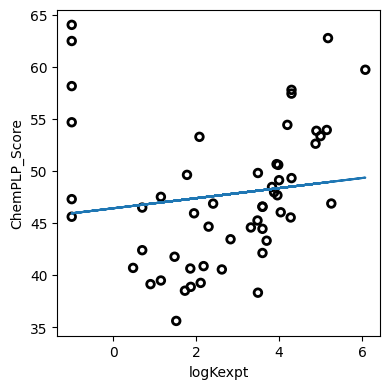

In [18]:
plotter.Plotter.hg_scatter_plt_tl(chemplp_score, 1, 2)

### Multivariate linear regression on the training set from the manuscript using eq. 2

Coefficients = [-4.29538085 -2.3586354   0.23377324 -0.05860376]
RMSE: 1.659942336493641


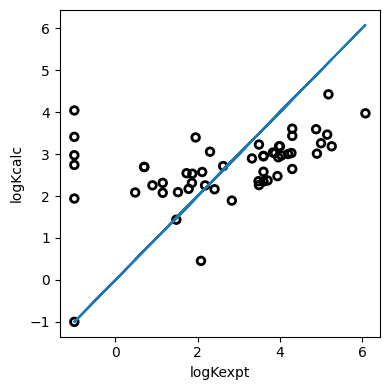

In [19]:
y_train = eq3_train_logk.iloc[:54,1]
x_train = np.array(tab_gold_wt.iloc[:54,1:5])
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(pd.DataFrame(x_train))
coeff = model.coef_
print(f'Coefficients = {coeff}')
print(f'RMSE: {root_mean_squared_error(y_train, y_pred)}')
plotter.Plotter.hg_scatter_mod_tl(y_train, y_pred, "logKexpt", "logKcalc")




### Multivariate linear regression on the training set from the manuscript using eq. 3

Coefficients = [-2.55758937  0.4843824  -0.17864573 -0.15504664 -0.99953168]
RMSE: 0.7415595482366735


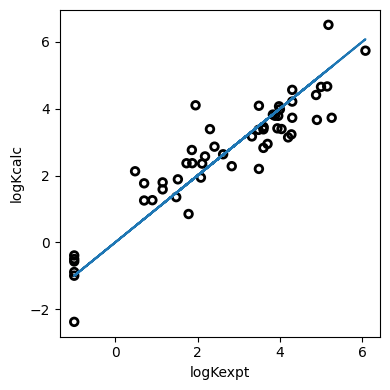

In [20]:
y_train = eq3_train_logk.iloc[:54,1]
x_train = np.array(tab_gold_wt.iloc[:54,1:])
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(pd.DataFrame(x_train))
coeff = model.coef_
print(f'Coefficients = {coeff}')
print(f'RMSE: {root_mean_squared_error(y_train, y_pred)}')
plotter.Plotter.hg_scatter_mod_tl(y_train, y_pred, "logKexpt", "logKcalc")

### Analysis of new guests from the manuscripts

RMSE: 0.7180619986113516


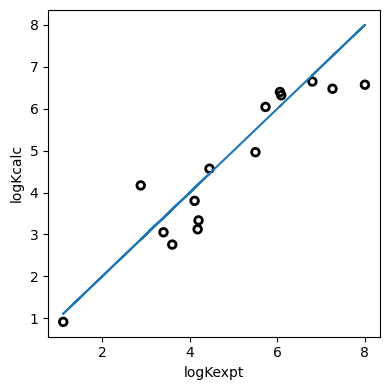

In [21]:
# get GoldPLP functions from the new guests  as an array
x_new = np.array(tab_gold_wt.iloc[54:,1:])
# predict logKcalc for new guests using our models
y_new_pred = model.predict(pd.DataFrame(x_new))
#  turn logKexp for new guests into an array
y_known = np.array(eq3_test_logk.iloc[:,1:2])
# Calculate RMSE for new guest and plot
print(f'RMSE: {root_mean_squared_error(y_known, y_new_pred)}')
plotter.Plotter.hg_scatter_mod_tl(y_known, y_new_pred, "logKexpt", "logKcalc")

## A current data science approach to this data set

In [22]:
#buld a df for all guest logKexp
exp_cols = [ eq3_train_logk.iloc[:,0:2] , eq3_test_logk.iloc[:,0:2]]
all_logKexp = pd.concat(exp_cols)
all_logKexp = all_logKexp.reset_index(drop=True)
all_logKexp.tail()

,Guest,logKexpt
64,65.0,4.20
65,66.0,4.11
66,67.0,3.60
67,68.0,1.11
68,69.0,3.40


### Run some exploratory data analysis

In [23]:

# Check functions from gold
tab_gold_wt.tail()

,Guest,Ligand_clash,Ligand_torsion,Part_buried,Non-polar,Ligand_flexibility
64,65,0.0,0.0000,-0.5568,-40.2497,0
65,66,0.0,0.0000,-0.5162,-49.7484,1
66,67,0.0,0.0000,-1.7830,-35.1129,0
67,68,0.0,0.0812,-3.8245,-33.5117,2
68,69,0.0,0.0011,-3.8230,-41.0994,1


In [24]:
# I'll be doing more plotting this time so I'll be OOP
eda = plotter.Plotter()

init_Plotter


['Ligand_clash', 'Ligand_torsion', 'Part_buried', 'Non-polar', 'Ligand_flexibility']


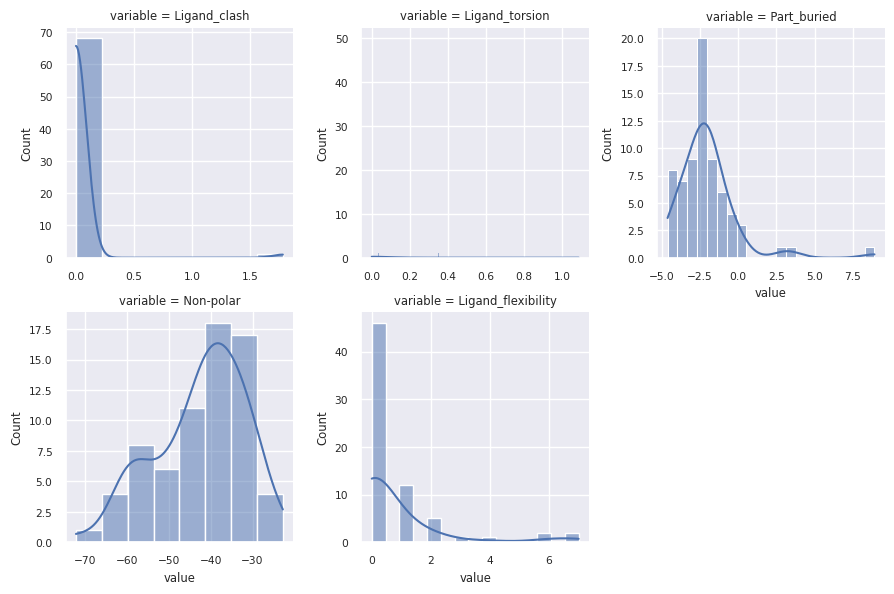

In [25]:
lst_col = list(tab_gold_wt.columns)
lst_col.pop(0)
print(lst_col)
eda.grid_hist_kde(tab_gold_wt,lst_col)

...
 Ligand_torsion


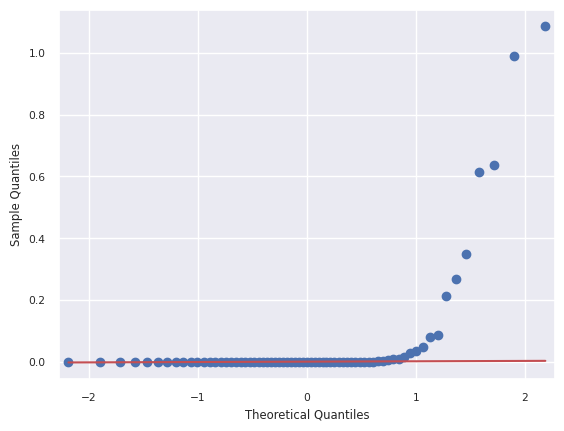


 count    69.000000
mean      0.064996
std       0.206884
min       0.000000
25%       0.000000
50%       0.000000
75%       0.001600
max       1.085500
Name: Ligand_torsion, dtype: float64



In [26]:
# Lets get some stats on an odd looking example 'Ligand_torsion'
# doesn't show much I will leave it as is.
eda.q_q_plot(tab_gold_wt,'Ligand_torsion')

This quantile-quantile plot does not align to a theoretical distibuton, we don't wory, my knowlage of the subject and the orginal mauscript of which I was a co-auther tells me that this is good

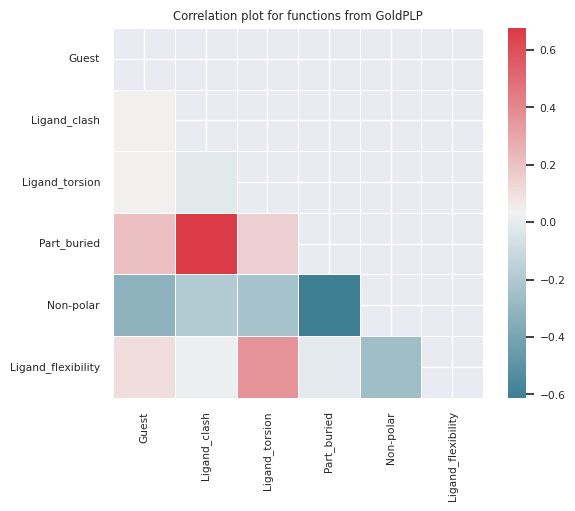

In [27]:
# Correlation plot show overcorrelation
eda.mat_hm_corr_plot(tab_gold_wt,"Correlation plot for functions from GoldPLP")

all good

In [28]:
# put all gold functions into an array and check shape
x_all = np.array(tab_gold_wt.iloc[:,1:])
x_all.shape

(69, 5)

Normilise our data

In [29]:
x_all = preprocessing.normalize(x_all)
#print(x_all)

### Rerun our model

In [30]:
# A Random seed fort the split of test and train
# change the seed?
np.random.seed(15)

X = x_all
y = all_logKexp.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Testing: {len(y_test)}")

Number of samples in:
    Training: 55
    Testing: 14


Coefficients = [[-468.92001849   80.27818155   40.05474146  184.59199134  -53.07928189]]
RMSE: 1.4592095135224934


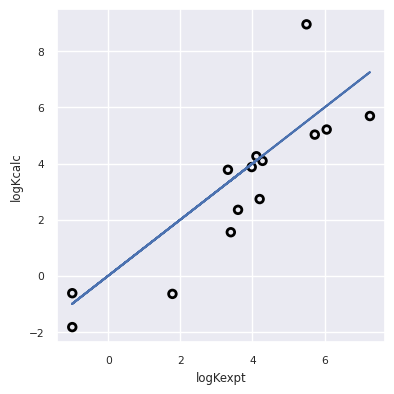

In [31]:


model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(pd.DataFrame(X_test))
coeff = model.coef_
print(f'Coefficients = {coeff}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')
plotter.Plotter.hg_scatter_mod_tl(y_test, y_pred, "logKexpt", "logKcalc")

### Let try some different models..

### Random forest regression
a disssion tree based method

In [32]:
# A Random seed fort the split of test and train
# change the seed?
np.random.seed(15)

X = x_all
y = all_logKexp.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Testing: {len(y_test)}")

Number of samples in:
    Training: 55
    Testing: 14


RMSE: 0.8309759415891872


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


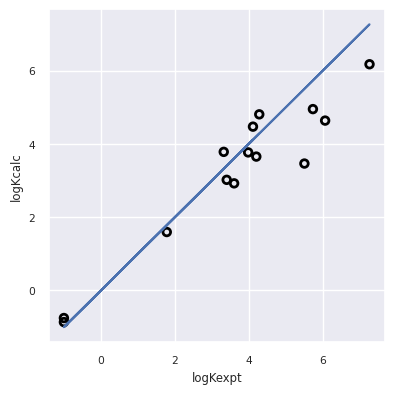

In [33]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1).fit(X_train, y_train)
y_pred = model.predict(pd.DataFrame(X_test))
#coeff = model.coef_
#print(f'Coefficients = {coeff}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')
plotter.Plotter.hg_scatter_mod_tl(y_test, y_pred, "logKexpt", "logKcalc")

#### MLP regressoin
Multi-layer Perceptron regression this a neural networks method

In [34]:
# A Random seed fort the split of test and train
# change the seed?
np.random.seed(15)

X = x_all
y = all_logKexp.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Testing: {len(y_test)}")

Number of samples in:
    Training: 55
    Testing: 14


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 1.0257319446264144


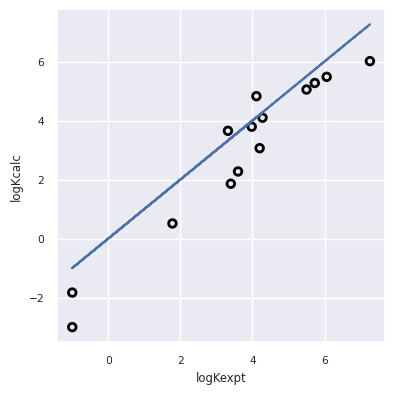

In [35]:
model = MLPRegressor(hidden_layer_sizes=(64, 32),max_iter=10000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#coeff = model.coef_
#print(f'Coefficients = {coeff}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')
plotter.Plotter.hg_scatter_mod_tl(y_test, y_pred, "logKexpt", "logKcalc")